In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')

In [ ]:
import uuid
from langchain_core.messages import HumanMessage
from src.ai.pandas_ml_assistant import build_graph

In [4]:
async def visualize_dataframe_assistant_graph():
    graph = await build_graph()
    return graph

In [5]:
assistant_graph = await visualize_dataframe_assistant_graph()
print(assistant_graph.get_graph().draw_mermaid())

---
config:
  flowchart:
    curve: linear
---
graph TD;
	__start__([<p>__start__</p>]):::first
	conversation(conversation)
	pandas_agent(pandas_agent)
	ml_agent(ml_agent)
	__end__([<p>__end__</p>]):::last
	__start__ --> conversation;
	ml_agent --> __end__;
	pandas_agent --> __end__;
	conversation -.-> pandas_agent;
	conversation -.-> ml_agent;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc



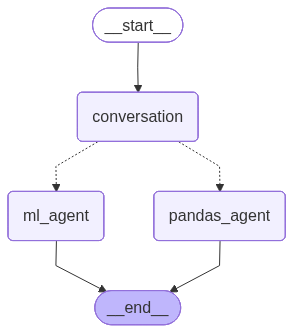

In [6]:
assistant_graph

In [7]:
thread_id = str(uuid.uuid4())
config = {"configurable": {"thread_id" : thread_id}}

In [8]:
async def log_assistant_graph_steps(query: str, config: dict):
    step = 1
    current_tool = None
    async for token, metadata in assistant_graph.astream(
            {"messages": [HumanMessage(content=query)]}, config=config, stream_mode="messages"
    ):
        current_node = metadata.get('langgraph_node', 'unknown')
        
        # Check if this is a tool call by looking at the message content
        if hasattr(token, 'tool_calls') and token.tool_calls:
            for tool_call in token.tool_calls:
                tool_name = tool_call.get('name', 'unknown_tool')
                print(f"\n🔧 Calling tool: {tool_name}")
                current_tool = tool_name
        
        # Print step metadata when it changes
        if metadata['langgraph_step'] == step:
            print(f"\n🔄 Step {step}: Node '{current_node}'")
            if current_node == 'tools' and current_tool:
                print(f"   └── Executing tool: {current_tool}")
            print("Metadata", metadata, "\n")
            step += 1
            
        print(token.content, end='', flush=True)

In [9]:
query = "List the columns of my dataset."
await log_assistant_graph_steps(query, config)


🔄 Step 1: Node 'conversation'
Metadata {'thread_id': '2c109ba3-8186-464d-a495-d97f74cfe65e', 'langgraph_step': 1, 'langgraph_node': 'conversation', 'langgraph_triggers': ('branch:to:conversation', 'start:conversation'), 'langgraph_path': ('__pregel_pull', 'conversation'), 'langgraph_checkpoint_ns': 'conversation:7a6a079f-6a32-e18f-331d-148151056266', 'checkpoint_ns': 'conversation:7a6a079f-6a32-e18f-331d-148151056266', 'ls_provider': 'ollama', 'ls_model_name': 'gpt-oss:20b', 'ls_model_type': 'chat', 'ls_temperature': 0.7} 

pandas_agent
🔧 Calling tool: python_repl_ast

🔄 Step 2: Node 'tools'
   └── Executing tool: python_repl_ast
Metadata {'thread_id': '2c109ba3-8186-464d-a495-d97f74cfe65e', 'langgraph_step': 2, 'langgraph_node': 'tools', 'langgraph_triggers': ('branch:to:tools',), 'langgraph_path': ('__pregel_pull', 'tools'), 'langgraph_checkpoint_ns': 'pandas_agent:086ee238-59e3-3a68-9696-9dfbaf2c66af|tools:a3954227-35a0-70be-8211-b9219e96b773', 'checkpoint_ns': 'pandas_agent:086ee2

In [10]:
query = "please give me descriptive statistics of the data"
await log_assistant_graph_steps(query, config)

pandas_agent
🔄 Step 1: Node 'agent'
Metadata {'thread_id': '2c109ba3-8186-464d-a495-d97f74cfe65e', 'langgraph_step': 1, 'langgraph_node': 'agent', 'langgraph_triggers': ('branch:to:agent', 'start:agent', 'tools'), 'langgraph_path': ('__pregel_pull', 'agent'), 'langgraph_checkpoint_ns': 'pandas_agent:c81af8dc-dcca-1558-9783-ccfe101f630b|agent:68bb6931-6606-1146-6f82-56535b61eb53', 'checkpoint_ns': 'pandas_agent:c81af8dc-dcca-1558-9783-ccfe101f630b', 'ls_provider': 'ollama', 'ls_model_name': 'gpt-oss:20b', 'ls_model_type': 'chat', 'ls_temperature': 0.7} 


🔧 Calling tool: python_repl_ast

🔄 Step 2: Node 'tools'
   └── Executing tool: python_repl_ast
Metadata {'thread_id': '2c109ba3-8186-464d-a495-d97f74cfe65e', 'langgraph_step': 2, 'langgraph_node': 'tools', 'langgraph_triggers': ('branch:to:tools',), 'langgraph_path': ('__pregel_pull', 'tools'), 'langgraph_checkpoint_ns': 'pandas_agent:c81af8dc-dcca-1558-9783-ccfe101f630b|tools:863ba904-ac15-2534-527c-98f4e6e97f2f', 'checkpoint_ns': 'pa

In [11]:
query = "Let's now build a decision tree model using as our target variable 'disease_risk'"
await log_assistant_graph_steps(query, config)

ml_agent
🔄 Step 1: Node 'agent'
Metadata {'thread_id': '2c109ba3-8186-464d-a495-d97f74cfe65e', 'langgraph_step': 1, 'langgraph_node': 'agent', 'langgraph_triggers': ('branch:to:agent', 'start:agent', 'tools'), 'langgraph_path': ('__pregel_pull', 'agent'), 'langgraph_checkpoint_ns': 'ml_agent:555c1346-42f1-44ef-9086-f0426a181e39|agent:f55ba62c-d2e7-029b-6fbd-0482d4f2fe2c', 'checkpoint_ns': 'ml_agent:555c1346-42f1-44ef-9086-f0426a181e39', 'ls_provider': 'ollama', 'ls_model_name': 'gpt-oss:20b', 'ls_model_type': 'chat', 'ls_temperature': 0.7} 



2025-10-14 08:22:12,913 - dataframe-chatbot - INFO - #Train examples = 80000
2025-10-14 08:22:12,913 - dataframe-chatbot - INFO - #Test examples = 20000
2025-10-14 08:22:18,151 - dataframe-chatbot - INFO - Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
2025-10-14 08:22:18,151 - dataframe-chatbot - INFO - Best CV Macro F1: 0.3439806638365158
2025-10-14 08:22:18,151 - dataframe-chatbot - INFO - ----------

2025-10-14 08:22:18,177 - dataframe-chatbot - INFO - ---- Train Results ----
2025-10-14 08:22:18,178 - dataframe-chatbot - INFO - Recall (binary) = 0.6385153850027698
2025-10-14 08:22:18,178 - dataframe-chatbot - INFO - Precision (binary) = 0.27773761801493946
2025-10-14 08:22:18,178 - dataframe-chatbot - INFO - F1-score (binary) = 0.38709775905232946
2025-10-14 08:22:18,178 - dataframe-chatbot - INFO - ----------

2025-10-14 08:22:18,178 - dataframe-chatbot - INFO - ---- Test Results ----
2025-10-14 08:22:18,179 - dataframe-chatbot - INFO - Recall (b


🔄 Step 2: Node 'tools'
   └── Executing tool: python_repl_ast
Metadata {'thread_id': '2c109ba3-8186-464d-a495-d97f74cfe65e', 'langgraph_step': 2, 'langgraph_node': 'tools', 'langgraph_triggers': ('branch:to:tools',), 'langgraph_path': ('__pregel_pull', 'tools'), 'langgraph_checkpoint_ns': 'ml_agent:555c1346-42f1-44ef-9086-f0426a181e39|tools:f0b93955-9779-0707-c999-4c8d6c68884c', 'checkpoint_ns': 'ml_agent:555c1346-42f1-44ef-9086-f0426a181e39'} 

{"model_uri": "/home/davit/medium/dataframe_chatbot/models/decision_tree/model.joblib", "metrics": {"train": {"Recall (binary)": 0.6385153850027698, "Precision (binary)": 0.27773761801493946, "F1-score (binary)": 0.38709775905232946}, "test": {"Recall (binary)": 0.5703062046736502, "Precision (binary)": 0.24561860142287004, "F1-score (binary)": 0.3433596118859915}}}
🔄 Step 3: Node 'agent'
Metadata {'thread_id': '2c109ba3-8186-464d-a495-d97f74cfe65e', 'langgraph_step': 3, 'langgraph_node': 'agent', 'langgraph_triggers': ('branch:to:agent', 'sta

In [12]:
query = "Please give me the value distribution of the column 'disease_risk'"
await log_assistant_graph_steps(query, config)

pandas_agent
🔄 Step 1: Node 'agent'
Metadata {'thread_id': '2c109ba3-8186-464d-a495-d97f74cfe65e', 'langgraph_step': 1, 'langgraph_node': 'agent', 'langgraph_triggers': ('branch:to:agent', 'start:agent', 'tools'), 'langgraph_path': ('__pregel_pull', 'agent'), 'langgraph_checkpoint_ns': 'pandas_agent:4f084b36-620c-2963-e3ec-c6116f57656b|agent:4d755504-d16a-0e86-cd5f-6b8ab0195196', 'checkpoint_ns': 'pandas_agent:4f084b36-620c-2963-e3ec-c6116f57656b', 'ls_provider': 'ollama', 'ls_model_name': 'gpt-oss:20b', 'ls_model_type': 'chat', 'ls_temperature': 0.7} 


🔧 Calling tool: python_repl_ast

🔄 Step 2: Node 'tools'
   └── Executing tool: python_repl_ast
Metadata {'thread_id': '2c109ba3-8186-464d-a495-d97f74cfe65e', 'langgraph_step': 2, 'langgraph_node': 'tools', 'langgraph_triggers': ('branch:to:tools',), 'langgraph_path': ('__pregel_pull', 'tools'), 'langgraph_checkpoint_ns': 'pandas_agent:4f084b36-620c-2963-e3ec-c6116f57656b|tools:962d414f-49ab-c5b5-f1af-ca3e65546869', 'checkpoint_ns': 'pa